In [1]:
import sys
import os
# Append the library path to PYTHONPATH, so library can be imported.
sys.path.append(os.path.dirname(os.getcwd()))
import itertools

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from library import common as cm

In [2]:
%run setup.py
%matplotlib inline

sns.set(style='darkgrid')

In [3]:
cols = ['CONFIG=1/FREQ=1D_HALFMONEY=otm_MINM=0.8_MAXM=1.5_Permute=False_VIX=False',
       'CONFIG=1/FREQ=1D_HALFMONEY=otm_MINM=0.8_MAXM=1.5_Permute=False_VIX=True',
       'CONFIG=1/FREQ=1D_HALFMONEY=otm_MINM=0.8_MAXM=1.5_Permute=True_VIX=False',
       'CONFIG=1/FREQ=1D_HALFMONEY=otm_MINM=0.8_MAXM=1.5_Permute=True_VIX=True']

In [4]:
rows = ['Regression/BS_Benchmark', 
        'Regression/Delta_Vega_Vanna',
       'Network/Delta_Vega']

In [5]:
df_dirs = pd.DataFrame(columns=cols, index=rows)
for x, y in list(itertools.product(rows, cols)):
    df_dirs.loc[x, y] = f'{DATA_DIR}Result/{y}/{x}/'

In [6]:
kws = [('Regression/BS_Benchmark', 'Black-Scholes', 'o', -0.1, sns.color_palette()[0]),
       ('Regression/Delta_Vega_Vanna', 'LR', 'x', -0.05, sns.color_palette()[1]),
       ('Network/Delta_Vega',  r'ANN', '^', 0.1, sns.color_palette()[3])]

In [7]:
aggregating = 'mean'
measure = 'mse'

In [8]:
inspector = cm.Inspector()

In [9]:
df_res = inspector.evalPnls(df_dirs, aggregating=aggregating, measure=measure, op_type=None)
res_abs = df_res.xs('Absolute', level=1, axis=1)
df_res

setup                       CONFIG=1/FREQ=1D_HALFMONEY=otm_MINM=0.8_MAXM=1.5_Permute=False_VIX=False  \
value                                                                                       Absolute   
Regression/BS_Benchmark                                                  0.111                         
Regression/Delta_Vega_Vanna                                              0.111                         
Network/Delta_Vega                                                       0.113                         

setup                                \
value                       %Change   
Regression/BS_Benchmark        0.00   
Regression/Delta_Vega_Vanna    0.24   
Network/Delta_Vega             2.16   

setup                       CONFIG=1/FREQ=1D_HALFMONEY=otm_MINM=0.8_MAXM=1.5_Permute=False_VIX=True  \
value                                                                                      Absolute   
Regression/BS_Benchmark                                                  0.111                        
Regression/Delta_Vega_Vanna                                              0.117                        
Network/Delta_Vega                                                       0.120                        

setup                                \
value                       %Change   
Regression/BS_Benchmark        0.00   
Regression/Delta_Vega_Vanna    6.31   
Network/Delta_Vega             8.36   

setup                       CONFIG=1/FREQ=1D_HALFMONEY=otm_MINM=0.8_MAXM=1.5_Permute=True_VIX=False  \
value                                                                                      Absolute   
Regression/BS_Benchmark                                                  0.103                        
Regression/Delta_Vega_Vanna                                              0.100                        
Network/Delta_Vega                                                       0.100                        

setup                                \
value                       %Change   
Regression/BS_Benchmark        0.00   
Regression/Delta_Vega_Vanna   -2.89   
Network/Delta_Vega            -3.17   

setup                       CONFIG=1/FREQ=1D_HALFMONEY=otm_MINM=0.8_MAXM=1.5_Permute=True_VIX=True  \
value                                                                                     Absolute   
Regression/BS_Benchmark                                                  0.103                       
Regression/Delta_Vega_Vanna                                              0.097                       
Network/Delta_Vega                                                       0.096                       

setup                                
value                       %Change  
Regression/BS_Benchmark        0.00  
Regression/Delta_Vega_Vanna   -5.66  
Network/Delta_Vega            -6.80

In [10]:
res_rela = df_res.xs('%Change', level=1, axis=1)

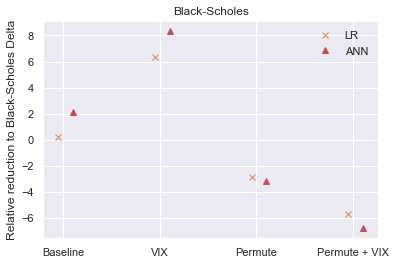

In [15]:

for col in kws[1:]:
    plt.plot(np.arange(1, 5)+col[3], res_rela.loc[col[0]], marker=col[2], linewidth=0, label=col[1], c=col[4])
plt.legend(frameon=False)
plt.xticks(np.arange(1, 5), ('Baseline', 'VIX', 'Permute', 'Permute + VIX'))
plt.ylabel('Relative reduction to Black-Scholes Delta')
plt.title('Black-Scholes')
plt.savefig(f'{DATA_DIR}Figure2_left.png', dpi=100)

#### Baseline
This section shows the the MSHE and its relative percentage change of the two statistical models compared to the BS-Delta in the 'baseline' experiment.

In [16]:
dirs_dict = {'Regression/BS_Benchmark': f'{DATA_DIR}Result/{cols[0]}/Regression/BS_Benchmark/',
             'Regression/Delta_Vega_Vanna': f'{DATA_DIR}Result/{cols[0]}/Regression/Delta_Vega_Vanna/',
            'Network/Delta_Vega': f'{DATA_DIR}Result/{cols[0]}/Network/Delta_Vega/'}

In [17]:
inspector = cm.Inspector()
baseline = inspector.eval_single_exp(dirs_dict, measure=measure)

In [18]:
bs_tmp = baseline['Regression/BS_Benchmark'].values[:, np.newaxis]
base_rela = (baseline[['Regression/Delta_Vega_Vanna', 'Network/Delta_Vega']] - bs_tmp) / bs_tmp

Text(0.5, 1.0, 'Relative to Black-Scholes')

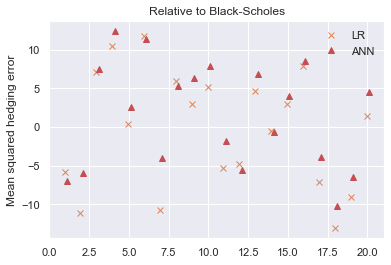

In [19]:
for col in kws[1:]:
    plt.plot(np.arange(1, NUM_TEST+1)+col[3], base_rela.loc[:, col[0]]*100, 
             marker=col[2], linewidth=0, label=col[1], c=col[4])
plt.legend(frameon=False)
plt.ylabel('Mean squared hedging error')
plt.title('Relative to Black-Scholes')

#### 'VIX' experiment
This section shows the the MSHE and its relative percentage change of the two statistical models compared to the BS-Delta in the 'VIX' experiment, on the ten out-of-sample sets

In [20]:
dirs_dict = {'Regression/BS_Benchmark': f'{DATA_DIR}Result/{cols[1]}/Regression/BS_Benchmark/',
             'Regression/Delta_Vega_Vanna': f'{DATA_DIR}Result/{cols[1]}/Regression/Delta_Vega_Vanna/',
            'Network/Delta_Vega': f'{DATA_DIR}Result/{cols[1]}/Network/Delta_Vega/'}
inspector = cm.Inspector()
res = inspector.eval_single_exp(dirs_dict, measure=measure)

Text(0.5, 1.0, 'Relative')

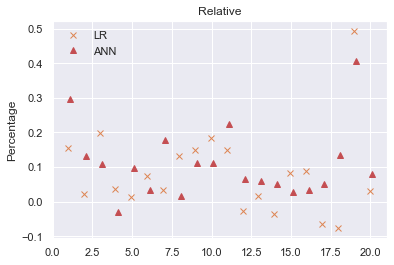

In [22]:
for col in kws[1:]:
    y = (res[col[0]] - res['Regression/BS_Benchmark']) / res['Regression/BS_Benchmark']
    plt.plot(np.arange(1, NUM_TEST+1)+col[3], y, marker=col[2], linewidth=0, label=col[1], color=col[4])
plt.legend(frameon=False)
plt.ylabel('Percentage')
plt.title('Relative')

#### 'Permute' experiment
This section shows the the MSHE and its relative percentage change of the two statistical models compared to the BS-Delta in the 'Permutation' experiment.

In [23]:
dirs_dict = {'Regression/BS_Benchmark': f'{DATA_DIR}Result/{cols[2]}/Regression/BS_Benchmark/',
             'Regression/Delta_Vega_Vanna': f'{DATA_DIR}Result/{cols[2]}/Regression/Delta_Vega_Vanna/',
            'Network/Delta_Vega': f'{DATA_DIR}Result/{cols[2]}/Network/Delta_Vega/'}
inspector = cm.Inspector()
res = inspector.eval_single_exp(dirs_dict, measure=measure)

Text(0.5, 1.0, 'Relative')

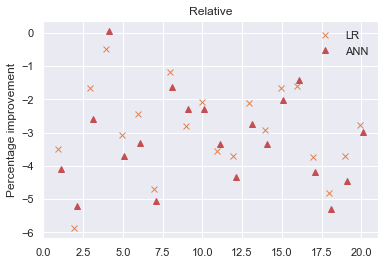

In [25]:
" Relative to the BS "
bs_tmp = res['Regression/BS_Benchmark'].values[:, np.newaxis]
res_rela = (res[['Regression/Delta_Vega_Vanna', 'Network/Delta_Vega']] - bs_tmp) / bs_tmp
for col in kws[1:]:
    y = (res[col[0]] - res['Regression/BS_Benchmark']) / res['Regression/BS_Benchmark']
    plt.plot(np.arange(1, NUM_TEST+1)+col[3], y*100, marker=col[2], linewidth=0, label=col[1], color=col[4])
plt.legend(frameon=False)
plt.ylabel('Percentage improvement')
plt.title('Relative')

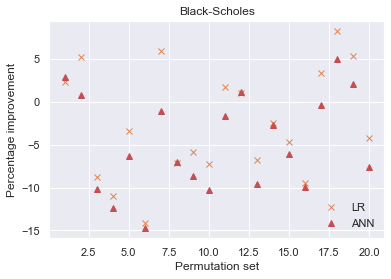

In [26]:
" This plots shows the change of percentage improvemen of the two models  comapred to the baseline experiment"
tmp = res_rela - base_rela

for x in kws[1:]:
    plt.plot(range(1, NUM_TEST+1), tmp[x[0]] * 100, marker=x[2], linewidth=0, label=x[1], c=x[4])
plt.xlabel('Permutation set')
plt.ylabel('Percentage improvement')
plt.legend(frameon=False)
plt.title('Black-Scholes')

rela_diff_pmt = tmp

#### Permuate + VIX experiment

In [27]:
dirs_dict = {'Regression/BS_Benchmark': f'{DATA_DIR}Result/{cols[3]}/Regression/BS_Benchmark/',
             'Regression/Delta_Vega_Vanna': f'{DATA_DIR}Result/{cols[3]}/Regression/Delta_Vega_Vanna/',
            'Network/Delta_Vega': f'{DATA_DIR}Result/{cols[3]}/Network/Delta_Vega/'}
inspector = cm.Inspector()
res = inspector.eval_single_exp(dirs_dict, measure=measure)

Text(0.5, 1.0, 'Relative')

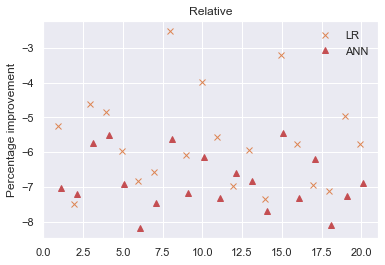

In [28]:
" Improvement compared to the Black-Scholes "
bs_tmp = res['Regression/BS_Benchmark'].values[:, np.newaxis]
res_rela = (res[['Regression/Delta_Vega_Vanna', 'Network/Delta_Vega']] - bs_tmp) / bs_tmp
for col in kws[1:]:
    y = (res[col[0]] - res['Regression/BS_Benchmark']) / res['Regression/BS_Benchmark']
    plt.plot(np.arange(1, NUM_TEST+1)+col[3], y*100, marker=col[2], linewidth=0, label=col[1], color=col[4])
plt.legend(frameon=False)
plt.ylabel('Percentage improvement')
plt.title('Relative')

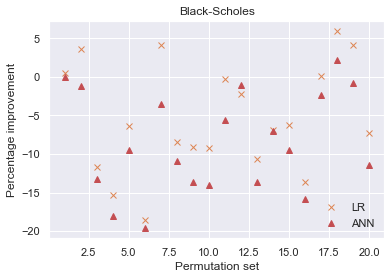

In [29]:
" the change of the percentage improvement  compared to the Baseline experiment"
tmp = res_rela - base_rela

for x in kws[1:]:
    plt.plot(range(1, NUM_TEST+1), tmp[x[0]] * 100, marker=x[2], linewidth=0, label=x[1], c=x[4])
plt.xlabel('Permutation set')
plt.ylabel('Percentage improvement')
plt.legend(frameon=False)
plt.title('Black-Scholes')

rela_diff_pmt_vix = tmp

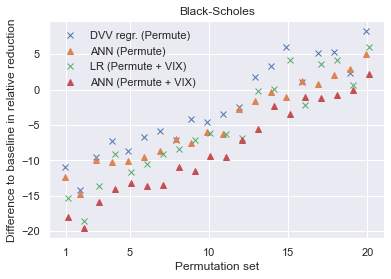

In [31]:
""" 
Combined plot of Permute and Permute + VIX, relative to baseline 
The permutation sets are sorted, according to the performance in the Baseline experiment.
"""
index_sorted = base_rela.sort_values(by='Network/Delta_Vega', ascending=False).index

fig, ax = plt.subplots()

kws_tmp = [('Regression/Delta_Vega_Vanna', 'DVV regr. (Permute)', 'x', -0.1),
 ('Network/Delta_Vega', 'ANN (Permute)', '^', -0.1)]

for x in kws_tmp:
    ax.plot(np.arange(1, NUM_TEST+1) + x[3], rela_diff_pmt.loc[index_sorted, x[0]].values*100, label=x[1], marker=x[2], linewidth=0)

kws_tmp = [('Regression/Delta_Vega_Vanna', 'LR (Permute + VIX)', 'x', 0.1),
         ('Network/Delta_Vega', 'ANN (Permute + VIX)', '^', 0.1)]  
for x in kws_tmp:
    ax.plot(np.arange(1, NUM_TEST+1) + x[3], rela_diff_pmt_vix.loc[index_sorted, x[0]].values*100, label=x[1], marker=x[2], linewidth=0)
plt.xticks([1, 5, 10, 15, 20], [1, 5, 10, 15, 20])
plt.legend(frameon=False)
plt.xlabel('Permutation set')
plt.ylabel('Difference to baseline in relative reduction')
plt.title("Black-Scholes")
plt.savefig(f'{DATA_DIR}/Figure2_right.png', dpi=100)